In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
# To get animation working
import matplotlib.animation
from IPython.display import HTML

<IPython.core.display.Javascript object>


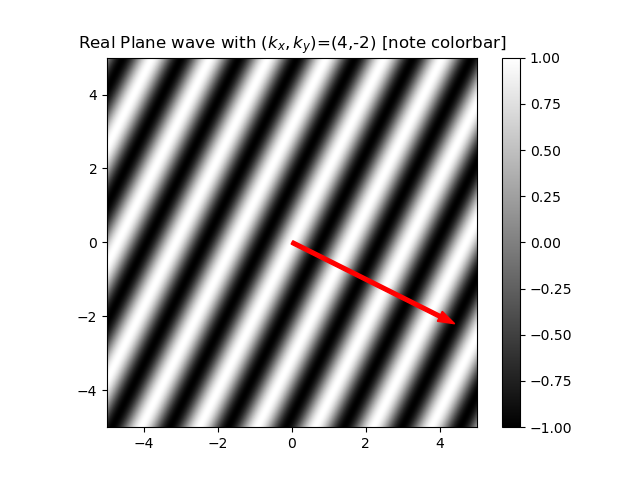

In [3]:
t = np.linspace(0,1,num=20)  # time steps

N = 500
A = np.zeros((N,N))
axis_x = np.linspace(-5,5,N)
axis_y = np.linspace(-5,5,N)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
(kx,ky) = (4,-2)
omega = 2*pi

figure()
A = cos(kx*X+ky*Y)
extents = (min(axis_x),max(axis_x),min(axis_y),max(axis_y))
imshow(A,extent=extents,origin='lower',cmap='gray',vmin=-1,vmax=+1)  # Need to spcify vmin,vmax
arrow(0,0,kx,ky,color='r',width=0.1)
colorbar()
title('Real Plane wave with $(k_x,k_y)$=(%d,%d) [note colorbar]'%(kx,ky));

<IPython.core.display.Javascript object>


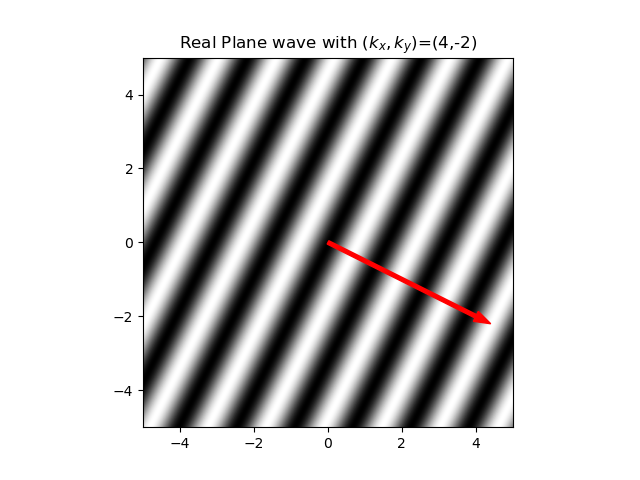

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(A,extent=extents,origin='lower',cmap='gray',vmin=-1,vmax=+1)  # Need to spcify vmin,vmax
arrow(0,0,kx,ky,color='r',width=0.1)
title('Real Plane wave with $(k_x,k_y)$=(%d,%d)'%(kx,ky))

def animate(i):
    A = cos(kx*X+ky*Y - omega*t[i])
    im.set_data(A)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t));

In [ ]:
HTML(ani.to_jshtml())

In [5]:
# Define colorize(z) to do Complex 2D Magnitude/Phase plots
# Copy and Paste this to plot complex 2D arrays
# See https://en.wikipedia.org/wiki/Domain_coloring
# from https://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array
from colorsys import hls_to_rgb

def colorize(z, log=False):
    '''
    Turn the array z of complex numbers into an array of rgb values where
    the hue is determined by the phase and the lightness is determined by
    the magnitude or the log of the magnitude
    '''
    n,m = z.shape
    c = np.zeros((n,m,3))
    # Infinity and non-a-number entries will be turned into something that won't throw errors
    c[np.isinf(z)] = (1.0, 1.0, 1.0)
    c[np.isnan(z)] = (0.5, 0.5, 0.5)
    
    idx = ~(np.isinf(z) + np.isnan(z))  # indicies that contain finite numbers
    # First get the hue based on the phase (angle) of the complex number
    A = (np.angle(z[idx]) + np.pi) / (2*np.pi)
    A = (A + 0.5) % 1.0
    # Now get the lightness based on the magnitude or log(magnitude)
    if log:
        #v = np.arctan(np.log(np.abs(z[idx])))/np.pi+0.5  # goes from 0 to 1 when log(abs(z)) goes -inf to +inf
        v = np.log(np.abs(z[idx]))
        # Rescale to the middle 99.9 percentile and clip off the outliers
        low  = np.percentile(v, 1)
        high = np.percentile(v,99.99)
        B = (v-low)/(high-low)  # rescale
        B[B<0] = 0.0
        B[B>1] = 1.0
        print(np.min(B), np.max(B))
    else:
        #B = 1.0 - 1.0/(1.0+abs(z[idx])**0.3)
        B = 1.0 - 1.0/(1.0+abs(z[idx])**0.6)  # the exponent must be less than 0
        #B = 2/np.pi*np.arctan(abs(z[idx]))
    c[idx] = [hls_to_rgb(a, b, 0.8) for a,b in zip(A,B)]
    return c

<IPython.core.display.Javascript object>


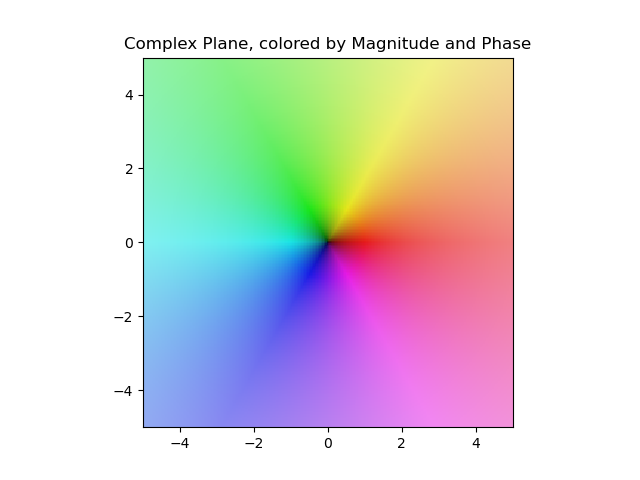

In [6]:
# Plot theComplex Plane
# Test Complex 2D plot
N = 250
axis_x = np.linspace(-5,5,N)
axis_y = np.linspace(-5,5,N)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
Z = X + Y*1j  # a 2D array where each entry is the complex number x+iy.
figure()
imshow(colorize(Z), interpolation='none',extent=(-5,5,-5,5),origin='lower')
title('Complex Plane, colored by Magnitude and Phase');

In [ ]:
# Explore the possible exponent mappings
figure()
N = 1000
x = np.linspace(0,5,N)
f = 2/np.pi*np.arctan(abs(x))
plot(x, f, label='arctan')
#mags = [0.1, 0.3, 0.5, 0.8, 1.0, 2.0]
mags = [0.5, 1.0, 2.0]
for a in reversed(mags):
    f = 1.0 - 1.0/(1.0+x**a)
    plot(x, f, label='1 - 1/(1+x**%0.1f)'%a)
legend()
xlim(min(x), max(x))
xlabel('magnitude abs(z)')
ylabel('lightness value')
title('Mapping from complex magnitude to lightness');

<IPython.core.display.Javascript object>


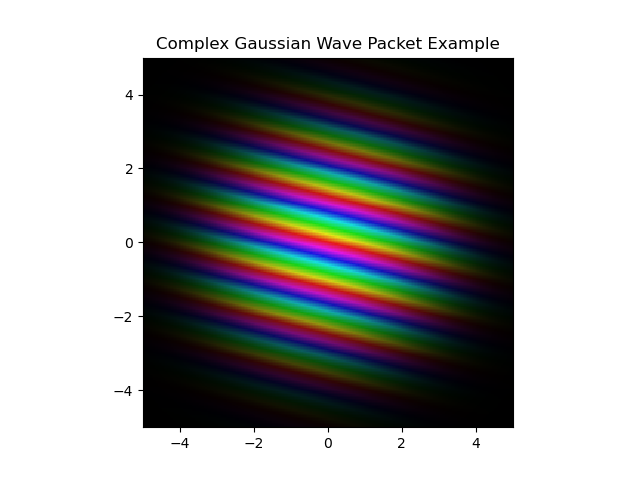

In [7]:
# Test Complex 2D plot
N = 250
A = np.zeros((N,N),dtype='complex')
axis_x = np.linspace(-5,5,N)
axis_y = np.linspace(-5,5,N)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
Z = X + Y*1j  # a 2D array where each entry is the complex number x+iy.
R = np.abs(Z)

# Select your favorite complex function
#A = Z
#A = 1/(Z+1j)**2 + 1/(Z-2)**2
#A = exp(1j*Z)
A = np.exp(2*np.pi*1j*(0.2*X+0.8*Y))*np.exp(-R**2/2**2)

# Plot the array "A" using colorize
figure()
imshow(colorize(A), interpolation='none',extent=(-5,5,-5,5),origin='lower')
title('Complex Gaussian Wave Packet Example');

<IPython.core.display.Javascript object>


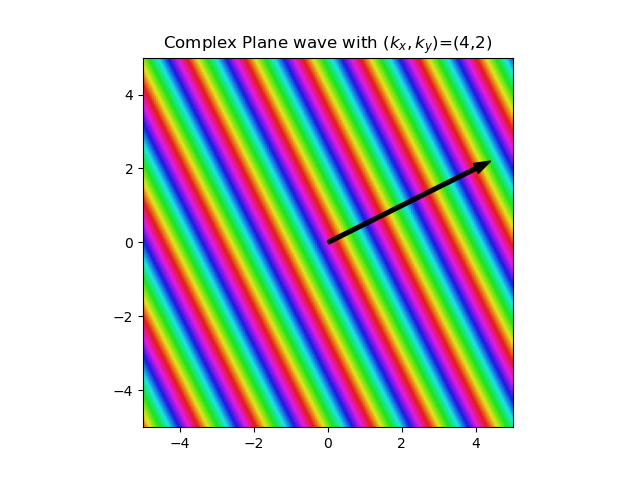

In [9]:
# Complex plane wave animation
t = np.linspace(0,1,num=20)  # time steps

N = 200
axis_x = np.linspace(-5,5,N)
axis_y = np.linspace(-5,5,N)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
(kx,ky) = (4,2)
omega = 2*pi
A = exp(1j*(kx*X+ky*Y))

fig, ax = plt.subplots()
extents = (min(axis_x),max(axis_x),min(axis_y),max(axis_y))
im = ax.imshow(colorize(A),extent=extents,origin='lower')  # Need to spcify vmin,vmax
arrow(0,0,kx,ky,color='k',width=0.1)
title('Complex Plane wave with $(k_x,k_y)$=(%d,%d)'%(kx,ky))

def animate(i):
    A = exp(1j*(kx*X+ky*Y - omega*t[i]))
    im.set_data(colorize(A))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t));

In [ ]:
HTML(ani.to_jshtml())

In [ ]:
# Complex animation
theta = np.linspace(30,-30,num=20)  # time steps

N = 200
axis_x = np.linspace(-5,5,N)
axis_y = np.linspace(-5,5,N)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
(kx,ky) = (4,2)
omega = 2*pi
A = exp(1j*(kx*X+ky*Y))

fig, ax = plt.subplots()
extents = (min(axis_x),max(axis_x),min(axis_y),max(axis_y))
im = ax.imshow(colorize(A),extent=extents,origin='lower')  # Need to spcify vmin,vmax
title('Complex Plane wave at t=0 with changing (kx,ky)')

def animate(i):
    kx = sqrt(4**2+2**2)*cos(theta[i]*pi/180)
    ky = sqrt(4**2+2**2)*sin(theta[i]*pi/180)
    A = exp(1j*(kx*X+ky*Y))
    im.set_data(colorize(A))
    arr = arrow(0,0,kx,ky,color='k',width=0.1)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(theta));

<IPython.core.display.Javascript object>


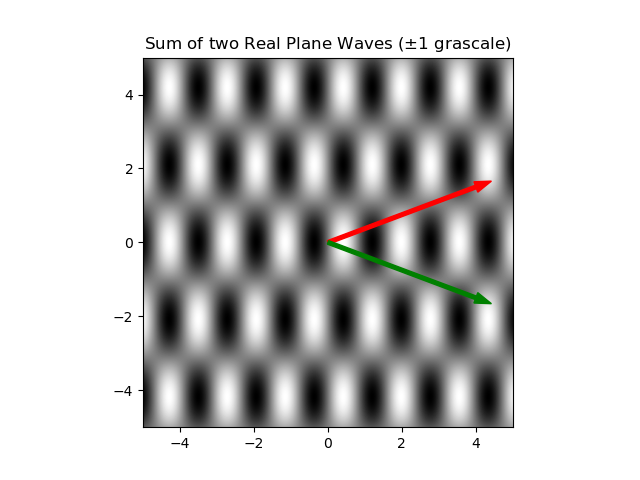

In [13]:
# Sum of two real waves
t = np.linspace(0,1,num=20)  # time steps

N = 500
A = np.zeros((N,N))
axis_x = np.linspace(-5,5,N)
axis_y = np.linspace(-5,5,N)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
(k1x,k1y) = (4,1.5)
(k2x,k2y) = (4,-1.5)
omega = 2*pi

fig, ax = plt.subplots()
extents = (min(axis_x),max(axis_x),min(axis_y),max(axis_y))
im = ax.imshow(A,extent=extents,origin='lower',cmap='gray',vmin=-1,vmax=+1)  # Need to spcify vmin,vmax
arrow(0,0,k1x,k1y,color='r',width=0.1)
arrow(0,0,k2x,k2y,color='g',width=0.1)
title('Sum of two Real Plane Waves ($\pm1$ grascale)')

def animate(i):
    A = cos(k1x*X+k1y*Y - omega*t[i])/2 + cos(k2x*X+k2y*Y - omega*t[i])/2
    im.set_data(A)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t));

In [ ]:
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>


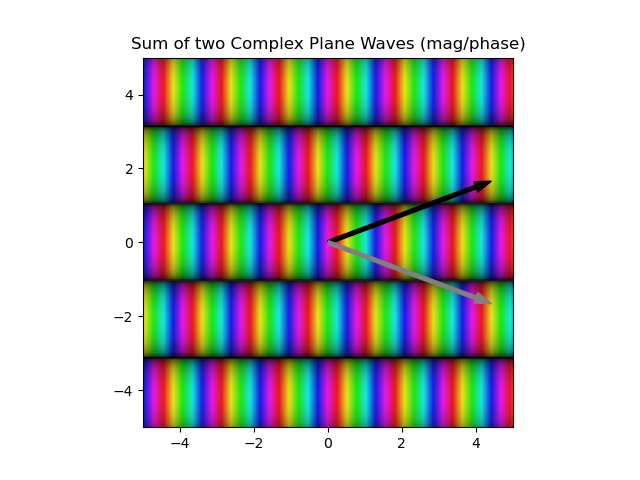

In [16]:
# Sum of two complex waves
t = np.linspace(0,1,num=20)  # time steps

N = 200
A = np.zeros((N,N))
axis_x = np.linspace(-5,5,N)
axis_y = np.linspace(-5,5,N)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
(k1x,k1y) = (4,1.5)
(k2x,k2y) = (4,-1.5)
omega = 2*pi

fig, ax = plt.subplots()
extents = (min(axis_x),max(axis_x),min(axis_y),max(axis_y))
A = exp(1j*(k1x*X+k1y*Y))/2 + exp(1j*(k2x*X+k2y*Y))/2
im = ax.imshow(colorize(A),extent=extents,origin='lower')
arrow(0,0,k1x,k1y,color='k',width=0.1)
arrow(0,0,k2x,k2y,color='gray',width=0.1)
title('Sum of two Complex Plane Waves (mag/phase)')

def animate(i):
    A = exp(1j*(k1x*X+k1y*Y - omega*t[i]))/2 + exp(1j*(k2x*X+k2y*Y - omega*t[i]))/2
    im.set_data(colorize(A))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

In [ ]:
HTML(ani.to_jshtml())

In [ ]:
# Just the magnitude
figure()
imshow(abs(A),extent=extents,origin='lower',cmap='gray')
colorbar()
arrow(0,0,k1x,k1y,color='k',width=0.1)
arrow(0,0,k2x,k2y,color='gray',width=0.1)
title('Sum of two Complex Plane Waves (Intensity; mag only)');

In [ ]:
# Gaussian Beam
lam = 1.0
w0 = 0.7
#w0 = sqrt(lam*z0/pi) # Rayleigh length

def w(z,lam,w0):
    'beam waist as a function of z'
    z0 = pi*w0**2/lam
    return w0*sqrt(1+(z/z0)**2)
def R(z,w0):
    'radius of curvature of the wave fronts'
    z0 = pi*w0**2/lam
    return z*(1+(z0/z)**2)
def envelope(r,z,lam,w0):
    k = 2*pi/lam
    z0 = pi*w0**2/lam
    amplitude = w0/w(z,lam,z0) * exp(-r**2/w(z,lam,z0)**2)
    longitudinal_phase = -arctan(z/z0)
    radial_phase = k*r**2/(2*R(z,z0))
    return amplitude*exp(1j*longitudinal_phase + 1j*radial_phase)
def Eplus(r,z,lam,w0):
    k = 2*pi/lam
    return envelope(r,z,lam,w0)*exp(1j*k*z)

axis_x = np.linspace(-18,18,180*4)
axis_y = np.linspace(-10,10,100*4)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
A = Eplus(Y,X,lam,w0)

# Plot the array "A" using colorize
figure(figsize=(9,5))
extents = (min(axis_x),max(axis_x),min(axis_y),max(axis_y))
imshow(colorize(A), interpolation='none',extent=extents,origin='lower')
title('Gaussian Beam with $w_0=%0.1f\lambda$'%w0);
xlabel('z (units of $\lambda$)')
ylabel('x or y (units of $\lambda$)');

In [ ]:
A = envelope(Y,X,lam,w0)

# Plot the array "A" using colorize
figure(figsize=(9,5))
extents = (min(axis_x),max(axis_x),min(axis_y),max(axis_y))
imshow(colorize(A), interpolation='none',extent=extents,origin='lower')
title('Gaussian Beam Envelope with $w_0=%0.1f\lambda$'%w0);
xlabel('z (units of $\lambda$)')
ylabel('x or y (units of $\lambda$)');

In [ ]:
# Intensity
figure(figsize=(9,5))
extents = (min(axis_x),max(axis_x),min(axis_y),max(axis_y))
imshow(abs(A)**2, interpolation='none',extent=extents,origin='lower',cmap='gray')
#colorbar()
title('Gaussian Beam Intensity with $w_0=%0.1f\lambda$'%w0);
xlabel('z (units of $\lambda$)')
ylabel('x or y (units of $\lambda$)');

In [ ]:
t = np.linspace(0.3,1,num=10)  # time steps
fig, ax = plt.subplots(figsize=(9,5))
axis_x = np.linspace(-18,18,180*2)
axis_y = np.linspace(-10,10,100*2)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
A = Eplus(Y,X,lam,w0)
im = ax.imshow(colorize(A),extent=extents,origin='lower')  # Need to spcify vmin,vmax
title('Gaussian Beams with increasing beam waists $w_0$')
xlabel('z (units of $\lambda$)')
ylabel('x or y (units of $\lambda$)');

def animate(i):
    w0 = t[i]
    A = Eplus(Y,X,lam,w0)
    im.set_data(colorize(A))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

In [ ]:
HTML(ani.to_jshtml())

In [ ]:
t = np.linspace(0.3,1,num=10)  # time steps
fig, ax = plt.subplots(figsize=(9,5))
axis_x = np.linspace(-18,18,180*2)
axis_y = np.linspace(-10,10,100*2)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
A = Eplus(Y,X,lam,w0)
im = ax.imshow(colorize(A),extent=extents,origin='lower')  # Need to spcify vmin,vmax
title('Gaussian Envelope with increasing beam waists $w_0$')
xlabel('z (units of $\lambda$)')
ylabel('x or y (units of $\lambda$)');

def animate(i):
    w0 = t[i]
    A = envelope(Y,X,lam,w0)
    im.set_data(colorize(A))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

In [ ]:
HTML(ani.to_jshtml())

In [ ]:
t = np.linspace(0.3,1,num=10)  # time steps
fig, ax = plt.subplots(figsize=(9,5))
axis_x = np.linspace(-18,18,180*2)
axis_y = np.linspace(-10,10,100*2)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
A = Eplus(Y,X,lam,w0)
im = ax.imshow(abs(A)**2,extent=extents,origin='lower',cmap='gray',vmin=0,vmax=0.3)  # Need to spcify vmin,vmax
title('Gaussian Intensity with increasing beam waists $w_0$')
xlabel('z (units of $\lambda$)')
ylabel('x or y (units of $\lambda$)');

def animate(i):
    w0 = t[i]
    A = Eplus(Y,X,lam,w0)
    im.set_data(abs(A)**2)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

In [ ]:
HTML(ani.to_jshtml())